In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import matplotlib.pyplot as plt#visualization
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/clinton-trump-tweets/tweets.csv


## Read Data

In [2]:
import pandas as pd
tweets = pd.read_csv("../input/clinton-trump-tweets/tweets.csv")
tweets = tweets[[ 'handle', 'text', 'is_retweet', 'original_author', 
                 'time', 'lang', 'retweet_count', 'favorite_count']]

### Let's have a look as general view.

In [3]:
tweets.head()

,handle,text,is_retweet,original_author,time,lang,retweet_count,favorite_count
0,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,en,218,651
1,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,en,2445,5308
2,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,en,7834,27234
3,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,en,916,2542
4,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,en,859,2882


In [4]:
tweets['lang'].value_counts()

en     6248
es      105
und      82
da        3
tl        2
fr        2
fi        1
et        1
Name: lang, dtype: int64

## Data manipulation

### Editing language names. As you see we have 3 main language but "und" is Undetermined then lets collect them as called "Other". And convert to date format and extract hour.

In [5]:
def language(df) :
    if df["lang"] == "en" :
        return "English"
    elif df["lang"] == "es" :
        return "Spanish"
    else :
        return "Other"

tweets["lang"] = tweets.apply(lambda tweets:language(tweets),axis = 1)


# datetime convert
from datetime import datetime
date_format = "%Y-%m-%dT%H:%M:%S" 
tweets["time"]   = pd.to_datetime(tweets["time"],format = date_format)
tweets["hour"]   = pd.DatetimeIndex(tweets["time"]).hour
tweets["month"]  = pd.DatetimeIndex(tweets["time"]).month
tweets["day"]    = pd.DatetimeIndex(tweets["time"]).day
tweets["month_f"]  = tweets["month"].map({1:"JAN",2:"FEB",3:"MAR",
                                        4:"APR",5:"MAY",6:"JUN",
                                        7:"JUL",8:"AUG",9:"SEP"})

### Lets have a look

In [6]:
tweets['lang'].value_counts()

English    6248
Spanish     105
Other        91
Name: lang, dtype: int64

### Seperate 'handle' and 'text' values then make DataFrame using concate.

In [7]:
data=pd.concat([tweets.handle, tweets.text], axis=1)       # data icinde handle ve text kisimini ayirip concate edip DF yaptik. cunku diger kisimlara ihtiyacimiz olmayacak

### Null values of rows are throwing up.

In [8]:
data.dropna(axis=0, inplace=True)                  # bos gozlem yerlerinin satirlarini sildik

### Let's check what we have in data.

In [9]:
data.handle.value_counts()  

HillaryClinton     3226
realDonaldTrump    3218
Name: handle, dtype: int64

### Overall Tweets and Retweets visualization

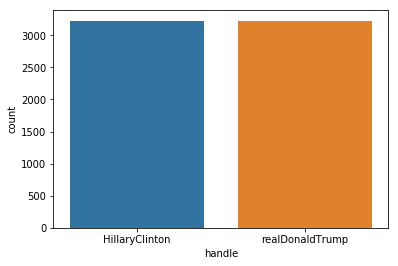

In [10]:
#Total number of tweets by both of the twitter handles
sns.countplot(x='handle', data = tweets)

## Time Analysis of the number of tweets

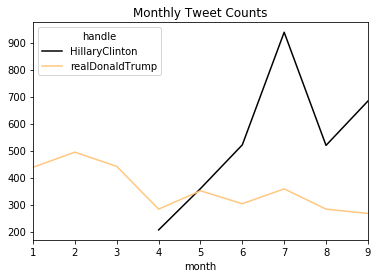

In [11]:
#Number of tweets by the months
monthly_tweets = tweets.groupby(['month', 'handle']).size().unstack()
monthly_tweets.plot(title='Monthly Tweet Counts', colormap='copper')

In [12]:
#trump tweets without retweets
tweets_trump   = (tweets[(tweets["handle"] == "realDonaldTrump") &
                         (tweets["is_retweet"] == False)].reset_index()
                  .drop(columns = ["index"],axis = 1))

#trump tweets with retweets
tweets_trump_retweets   = (tweets[(tweets["handle"] == "realDonaldTrump") &
                                  (tweets["is_retweet"] == True)].reset_index()
                                  .drop(columns = ["index"],axis = 1))

#hillary tweets without retweets
tweets_hillary  = (tweets[(tweets["handle"] == "HillaryClinton") &
                            (tweets["is_retweet"] == False)].reset_index()
                              .drop(columns = ["index"],axis = 1))

#hillary tweets with retweets
tweets_hillary_retweets  = (tweets[(tweets["handle"] == "HillaryClinton") &
                            (tweets["is_retweet"] == True)].reset_index()
                              .drop(columns = ["index"],axis = 1))

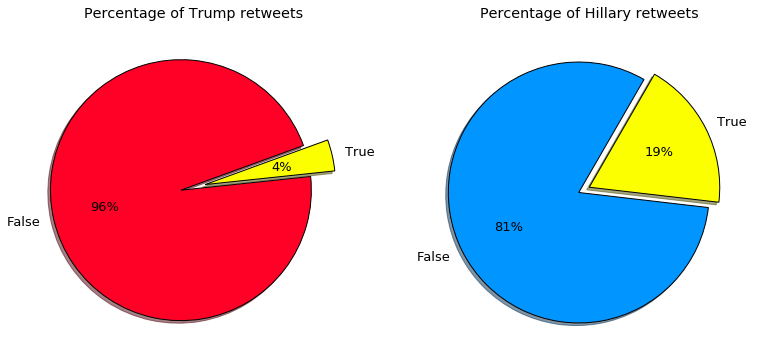

In [13]:
plt.style.use('ggplot')

plt.figure(figsize = (13,6))
plt.subplot(121)
tweets[tweets["handle"] ==
       "realDonaldTrump"]["is_retweet"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                                wedgeprops = {"linewidth" : 1,
                                                                              "edgecolor" : "k"},
                                                                shadow = True,fontsize = 13,
                                                                explode = [.1,0.09],
                                                                startangle = 20,
                                                                colors = ["#ff0026","#fbff00"]
                                                               )
plt.ylabel("")
plt.title("Percentage of Trump retweets")


plt.subplot(122)
tweets[tweets["handle"] ==
       "HillaryClinton"]["is_retweet"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                                wedgeprops = {"linewidth" : 1,
                                                                              "edgecolor" : "k"},
                                                                shadow = True,fontsize = 13,
                                                                explode = [.09,0],
                                                                startangle = 60,
                                                                colors = ["#0095ff","#fbff00"]
                                                               )
plt.ylabel("")
plt.title("Percentage of Hillary retweets")
plt.show()

### Using Regular expression for delete or cleaning of some expression. We are cleaning just for 5.row. If it is cleaned then we will use all data.

In [14]:
# regular expression yapalim. Burada gulucuk ve benzeri ifadeleri silmek icin

import re

first_text = data.text[5]                   # butun datadan once 5.siradaki datanin temizlenmesini yapalim bakalim temizlenmis ise butun dataya uygulamaya calisacagiz
text = re.sub("[^a-zA-Z]"," ", first_text)
text = text.lower()                        # ilk ve son haline gore description icindeki elemanlari kucultmesini istedik ve yazdirirsak kuculdugunu gorebiliriz

In [15]:
text

'join me for a  pm rally   tomorrow at the mid america center in council bluffs  iowa  tickets   https   t co dfzsbicixc'

### Now, lets download nltk for using 'stopwords' and 'punkt'. These are extracting some words like 'an', 'the',...

In [16]:
import nltk         # nltk nin download kiti bulunmaktadir. Bisey ifade etmeyen kelimeleri(Stop words ler ornegin 'an' veya 'the') cikarmamiz gerekiyor. Eger cikarmazsak 'an' veya 'the' kelimeleri enfazla kullanilanlar olarak gorunmus olacak bunlar bizim icin bisey ifade etmiyor
nltk.download("stopwords")          # hazir olarak bulunan stopwordslari indirip uygulayabiliriz
nltk.download("punkt")

from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


### Splitting words with tokenize modul from nltk.

In [17]:
text = nltk.word_tokenize(text)       # tokenize ettik yani kelimeleri birbirinden ayirdik. ayirmak icin split kullandik cunku mesela "doesn't" vy "shouldn't" kelimesini "does" ve "not" olarak ayiramiyor bunun icin tokenize kullandik


### Cleaning all useless words with stopwords.

In [18]:
text = [ word for word in text if not word in set(stopwords.words("english"))]

Let's check...

In [19]:
text

['join',
 'pm',
 'rally',
 'tomorrow',
 'mid',
 'america',
 'center',
 'council',
 'bluffs',
 'iowa',
 'tickets',
 'https',
 'co',
 'dfzsbicixc']

### Pure version of words.

In [20]:
# kelimeleri sade haline indirgemek icin

import nltk as nlp
nltk.download('wordnet')

lemma = nlp.WordNetLemmatizer()
text = [lemma.lemmatize(word) for word in text]

text = " ".join(text)

[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


### We cleaned 5.row in data. Now, we are doing for all data and add a list.

In [21]:
# simdi BUTUN VERI dekilere bunu uygulamak icin for dongusu olusturalim:

text_list = []
for text in data.text:
    text = re.sub("[^a-zA-Z]"," ", text)
    text= text.lower()
    text= nltk.word_tokenize(text)
    text = [ word for word in text if not word in set(stopwords.words("english"))]
    lemma = nlp.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text)
    text_list.append(text)

### Let's see every words in the list.

In [22]:
text_list

['question election put plan action make life better http co xreey oicg',
 'last night donald trump said paying tax smart know call unpatriotic http co xmbfj zf',
 'proud hillaryclinton vision command last night debate showed ready next potus',
 'stand together nothing make sure ready vote http co ttgeqxnqym http co q ymbb uny',
 'candidate asked confront racial injustice one real answer http co sjneokckis',
 'join pm rally tomorrow mid america center council bluff iowa ticket http co dfzsbicixc',
 'election important sit go http co ttgeqxnqym make sure registered nationalvoterregistrationday h',
 'donald trump go low register vote http co ttgeqxnqym http co dxz dewszs',
 'government people join movement today http co lwjydbphav http co uywjrtzkae',
 'trump offered single proposal reduce friction starting business hillaryclinton http co ohfafefsuq',
 'election week away check registered vote http co hcmah ljr take cl http co h h haa xm',
 'national voterregistrationday make sure regist

### If you want to how much words to determine in the words list, we are using CountVectorizer(for bag of words).

In [23]:
# bag of words: kac kelime kullanmak istiyorsak kendimiz belirliyoruz. Duygu kelimelerini verip analizini yapacagiz

from sklearn.feature_extraction.text import CountVectorizer        # bag of words olusturmak icin 

max_features = 5000               # max ... kadar kelimeye baksin

# Simdi modelimizi olusturalim
count_vectorizer = CountVectorizer(max_features=max_features, stop_words="english")
sparce_matrix = count_vectorizer.fit_transform(text_list).toarray()                     # modelimizi fitleyip array donusturduk


### Most used words determining number of tweets.

In [24]:
print(f"{max_features} most used words:\n\n{count_vectorizer.get_feature_names()}")

5000 most used words:

['aa', 'ab', 'abandon', 'abandoned', 'abc', 'abcpolitics', 'ability', 'able', 'abolish', 'abortion', 'abroad', 'absentee', 'absolute', 'absolutely', 'absurd', 'abuse', 'abusive', 'ac', 'accept', 'acceptance', 'accepted', 'accepts', 'access', 'accomplished', 'according', 'account', 'accountable', 'accurate', 'accused', 'achieve', 'achieved', 'act', 'acting', 'action', 'activist', 'activity', 'actonclimate', 'actor', 'actual', 'actually', 'actuar', 'ad', 'ada', 'adam', 'add', 'added', 'addiction', 'additional', 'address', 'addressing', 'adelante', 'administration', 'admiration', 'admire', 'admit', 'adoption', 'adult', 'advantage', 'advertiser', 'advertising', 'advice', 'adviser', 'advisor', 'advocate', 'ae', 'af', 'affect', 'affected', 'affecting', 'afford', 'affordable', 'aflcio', 'afr', 'afraid', 'african', 'afternoon', 'afxw', 'ag', 'age', 'agenda', 'agent', 'ago', 'agree', 'agreed', 'agreement', 'agrees', 'ah', 'ahead', 'ahernandez', 'ahora', 'aid', 'aidan', 'a

## Tweets month by month

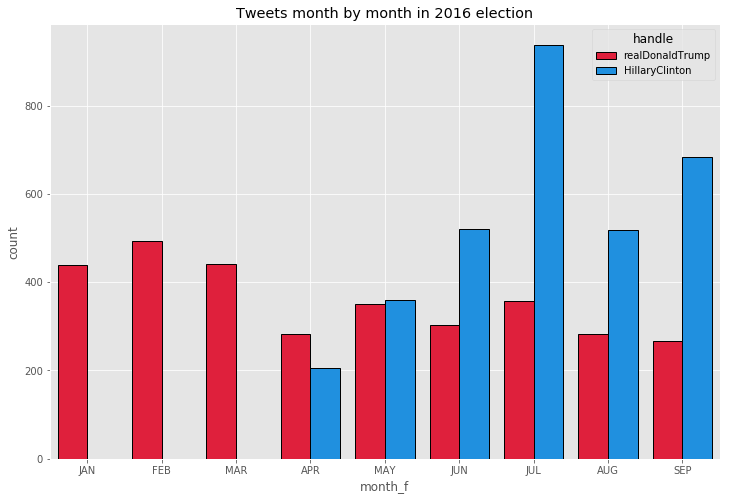

In [25]:
plt.figure(figsize = (12,8))
sns.countplot(x = "month_f",hue = "handle",palette = ["#ff0026","#0095ff"],
              data = tweets.sort_values(by = "month",ascending = True),
             linewidth = 1,edgecolor = "k"*tweets_trump["month"].nunique())
plt.grid(True)
plt.title("Tweets month by month in 2016 election")
plt.show()

## Categorize the text column into Positive and Negative sentiments using TextBlob

### Sentiment Analysis on the entiere dataset 

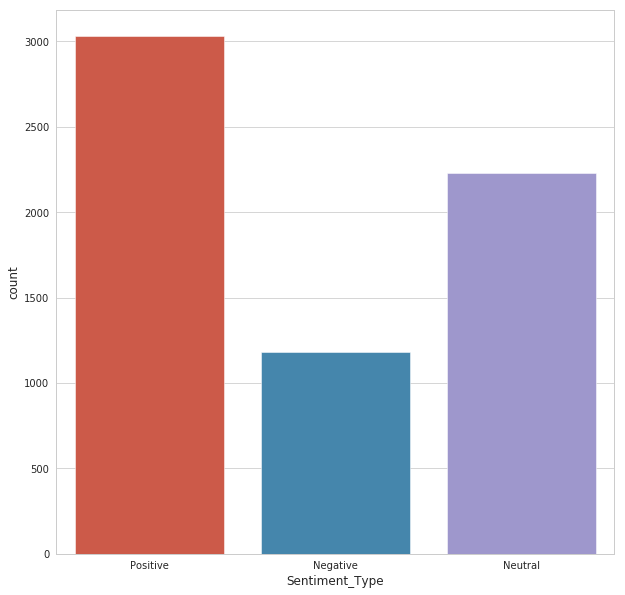

In [26]:
from textblob import TextBlob

bloblist_desc = list()                                  # butun tweet ler listeleniyor

df_tweet_descr_str=tweets['text'].astype(str)           # text ler ayiklaniyor

for row in df_tweet_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_tweet_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_tweet_polarity_desc):
    if df_tweet_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_tweet_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_tweet_polarity_desc['Sentiment_Type'] = df_tweet_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_tweet_polarity_desc)

# Conclusion

* If this tutorial is not enough you can check NLP for Beginners prepared by 
    - https://www.kaggle.com/mogady/kickstarter-s-nlp-anlaysis
* After this tutorial, my aim is to prepare 'kernel' which is connected to Recommendation System 'The Movies Dataset' data.
* If you have any suggestions, please could you write for me? I wil be happy for comment and critics!
* Thank you for your suggestion and votes ;)